## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master $ ```


## Problem 2: Sales Data Analysis

In [2]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
import numpy as np
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

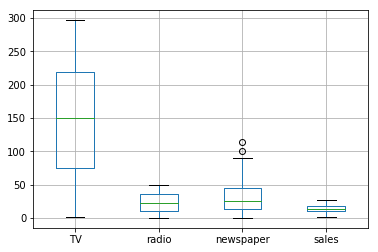

In [3]:
df.boxplot()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

In [4]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


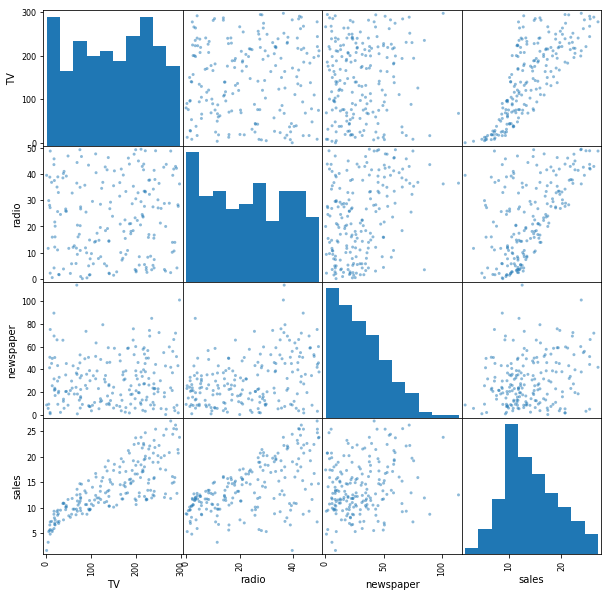

In [5]:
from pandas.plotting import scatter_matrix 
scatter_matrix(df,figsize=(10,10)) #data, alpha=0.2, figsize=(6, 6), diagonal='kde')
plt.show()


Which of the variables seem correlated with one another? Which don't? Explain your answer

From the figure shown above, we can see that only the TV and Radio seem correlated with Sales, but this line relationship is not strong.

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

a) Set y to be the sales in df

In [7]:
y = df['sales']

b) Set X to be just the features described above in df

In [8]:
X = df.drop(['sales'],1)

c) Randomly split data into training and testing - 80% training, 20% testing.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

d) Train model on training data, and make predictions on testing data

In [10]:
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))


Coefficients: 
 [ 0.04472952  0.18919505  0.00276111]
Residual sum of squares: 3.17


e) Evalute the R^2 on training data. Is this good? Bad? Why?

In [11]:
# Explained variance score: 1 is perfect prediction
print('R^2 Score: %.2f' % regr.score(X_test, y_test))

R^2 Score: 0.90


We can see that the R^2 = 0.9, which is a good value. Since it means this model could explain 90% data.

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

 It's a good model since the line we did seems fit most of the outliers.

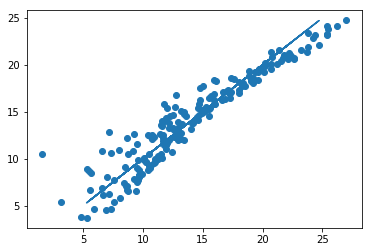

In [12]:
plt.scatter(y,regr.predict(X))
plt.plot(y_test,y_test)

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

Before we gat conclusions, we need mormalize our data and make sure we have removed the colinear features.

In [13]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
X2 = X.as_matrix().astype(np.float)
X2 = scaler.fit_transform(X)

size = float(len(X))
X_train = X2[0:int(size*0.8)]
X_test = X2[int(size*0.8):]

# Split the targets into training/testing sets
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))


Coefficients: 
 [ 4.04663787  2.66458107 -0.02050924]
Residual sum of squares: 2.79
Variance score: 0.90


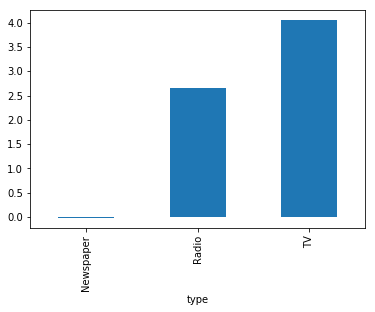

In [14]:
regr.coef_
df = pd.DataFrame({'type':['TV','Radio','Newspaper'], 'coef':regr.coef_})
df.groupby('type')['coef'].mean().plot(kind='bar')

h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

we can see that the TV has a significant impact for the result. One thing we should notice is that we need normalize the data set first, unless we might get a wrong conclusion.

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


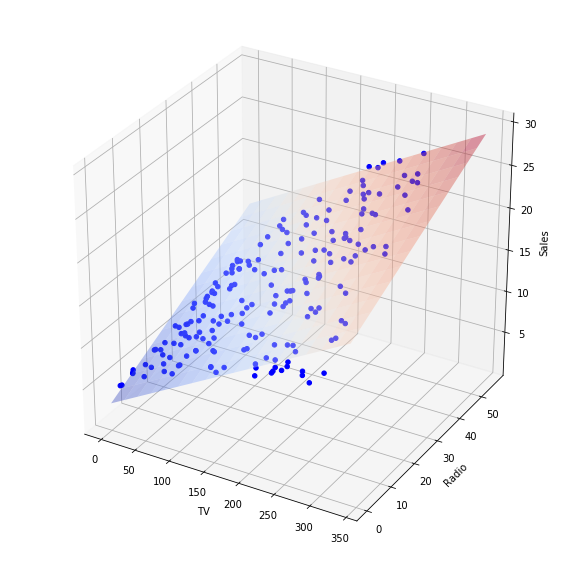

In [28]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from matplotlib import cm

csv = pd.read_csv('/Users/sunyuanqi/Desktop/Advertising.csv', index_col=0)
model = sm.ols(formula='sales ~ TV + radio', data = csv)
fit = model.fit()

fit.summary()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 350, 20)                # generate a mesh
y_surf = np.arange(0, 60, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'radio': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4,cmap=cm.coolwarm)

ax.scatter(csv['TV'], csv['radio'], csv['sales'],
           c='blue',
           marker='o',
           alpha=1)

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

plt.show()

Nonlinear model

In [16]:
X['TV*Radio']=X['TV']*X['radio']
X = X.drop(['newspaper'],1)

size = float(len(X))

X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.8):]

# Split the targets into training/testing sets
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

Coefficients: 
 [ 0.01918396  0.02648516  0.00109794]
Residual sum of squares: 0.39
Variance score: 0.99


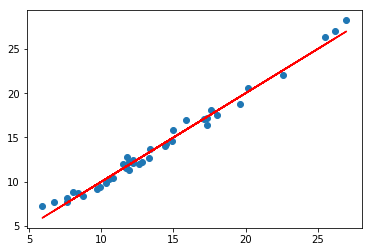

In [17]:
plt.scatter(y_test,regr.predict(X_test))
plt.plot(y_test,y_test,color='r')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Thu, 01 Mar 2018   Prob (F-statistic):          6.68e-146
Time:                        14:29:05   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.0

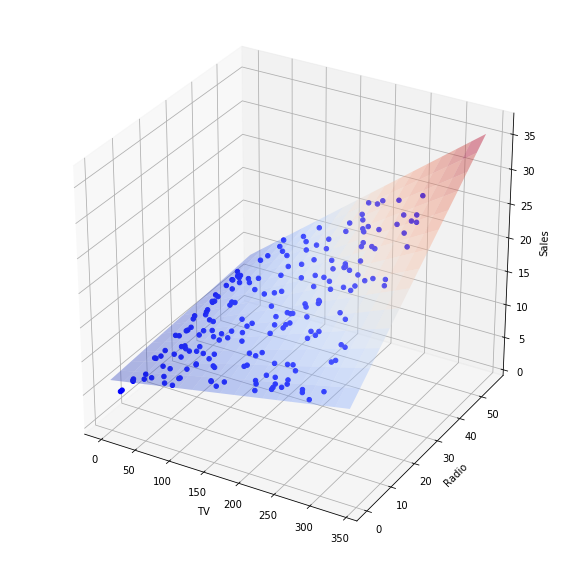

In [29]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from matplotlib import cm

csv = pd.read_csv('/Users/sunyuanqi/Desktop/Advertising.csv', index_col=0)

# Create a linear OLS model with TV:Radio interaction term 
# such that Sales = beta_0 + beta_1 * TV + beta_2 * Radio + beta_3 * Radio * TV
model = sm.ols(formula='sales ~ TV * radio', data = csv)
fit = model.fit()

a=fit.summary()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 350, 20) 
y_surf = np.arange(0, 60, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'radio': y_surf.ravel()})
out = fit.predict(exog = exog)

# Create surface plot
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4,cmap=cm.coolwarm)

# Create scatter plot
ax.scatter(csv['TV'], csv['radio'], csv['sales'],
           c='blue',
           marker='o',
           alpha=1)

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

# Print OLS regression results
print(fit.summary())
print ()

Non parametric model

In [19]:
df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()
y = df['sales']
X = df.drop(['sales'],1) 

from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Create linear regression object
regr = DecisionTreeRegressor(max_depth=5)

# Train the model using the training sets
regr.fit(X_train, y_train)


# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

Residual sum of squares: 2.12
Variance score: 0.93


In [20]:
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")



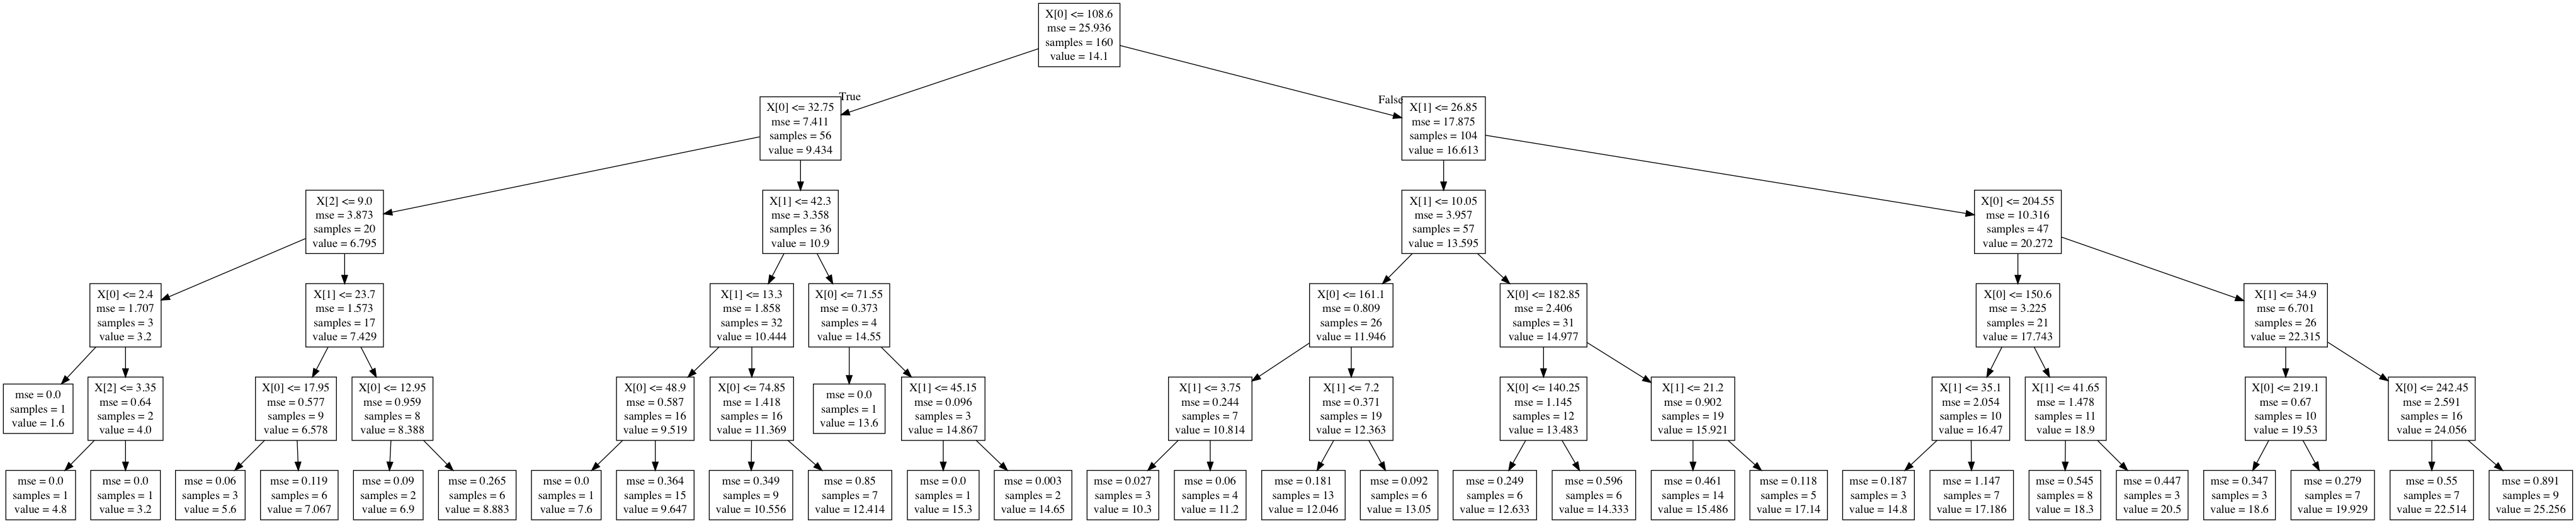

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image  
dot_data=export_graphviz(regr, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b =  0 m =  0 error =  5565.10783448
Running...
After {0} iterations b =  0.0350749705923 m =  1.47880271753  error =  112.647056643


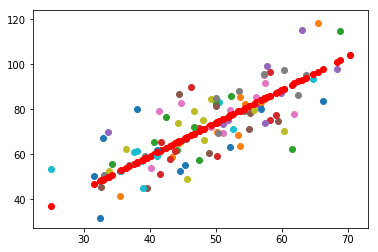

In [22]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]
errors=[]

def run(num_iterations,learning_rate = 0.0001):
    points = genfromtxt("/Users/sunyuanqi/Desktop/APMAE4990--master/data/data.csv", delimiter=",")
    learning_rate = learning_rate
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    b = initial_b
    m = initial_m
    error = compute_error_for_line_given_points(initial_b, initial_m, points)
    print ("Starting gradient descent at b = ",b, "m = ", m, "error = ",error)
    print ("Running...")
    
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    error = compute_error_for_line_given_points(b, m, points)
   
    print ("After {0} iterations b = ", b, "m = ",m," error = ",error)
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100)

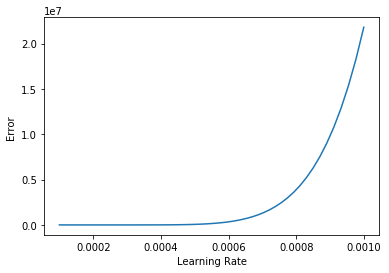

In [23]:
points = genfromtxt("/Users/sunyuanqi/Desktop/APMAE4990--master/data/data.csv", delimiter=",")

initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
num_iterations = 3

errors=[]
learning_rates = np.logspace(-4,-3,100)

for l in learning_rates:
    learning_rate = l
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    errors.append(compute_error_for_line_given_points(b, m, points))

plt.xlabel('Learning Rate')
plt.ylabel('Error ')

plt.plot(learning_rates,errors,label='num_iterations='+str(num_iterations))

The learning rate determines the time step size that to minimizing a give convex function used by gradient descent method. if the weighting for the things we want to place on the gradient descent function is small, that means we need larger number of step to find a acceptabe minimium value. therefore we need spend more time to figure out the rusult. Whlie the weighting value also shouldn't be too large since we might pass through the minimium value. so that lead to a divergent solution.

Starting gradient descent at b =  0 m =  0 error =  5565.10783448
Running...
After {0} iterations b =  0 m =  0  error =  5565.10783448


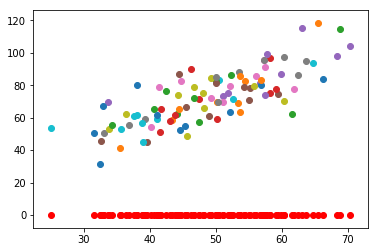

Starting gradient descent at b =  0 m =  0 error =  5565.10783448
Running...
After {0} iterations b =  0.0145470101107 m =  0.737070297359  error =  1484.58655741


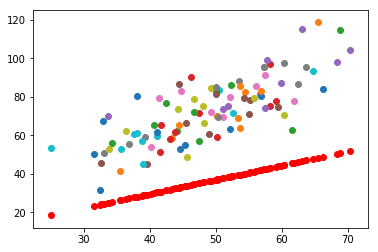

Starting gradient descent at b =  0 m =  0 error =  5565.10783448
Running...
After {0} iterations b =  0.0218739629596 m =  1.10679545435  error =  457.854257574


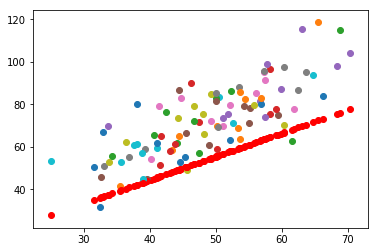

Starting gradient descent at b =  0 m =  0 error =  5565.10783448
Running...
After {0} iterations b =  0.0255792243213 m =  1.29225466491  error =  199.509985726


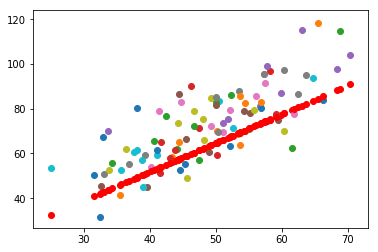

Starting gradient descent at b =  0 m =  0 error =  5565.10783448
Running...
After {0} iterations b =  0.0274677895591 m =  1.38528325565  error =  134.505910582


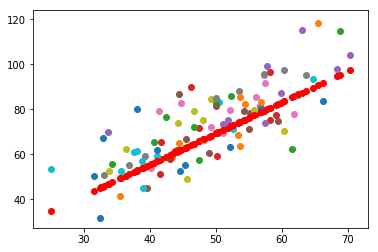

Starting gradient descent at b =  0 m =  0 error =  5565.10783448
Running...
After {0} iterations b =  0.0284450719817 m =  1.43194723238  error =  118.149693422


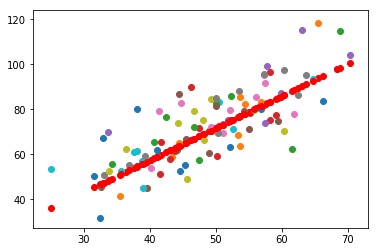

Starting gradient descent at b =  0 m =  0 error =  5565.10783448
Running...
After {0} iterations b =  0.0289652407665 m =  1.4553540089  error =  114.03414906


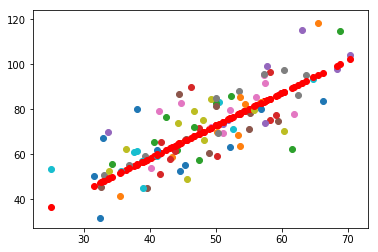

Starting gradient descent at b =  0 m =  0 error =  5565.10783448
Running...
After {0} iterations b =  0.029256114126 m =  1.46709461772  error =  112.998577317


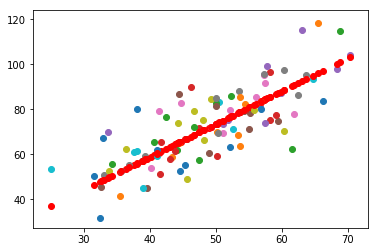

Starting gradient descent at b =  0 m =  0 error =  5565.10783448
Running...
After {0} iterations b =  0.0294319691638 m =  1.47298329822  error =  112.737981876


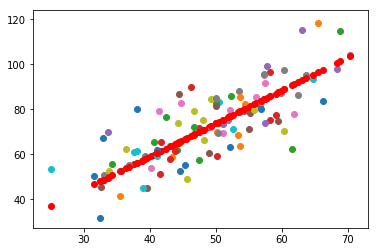

Starting gradient descent at b =  0 m =  0 error =  5565.10783448
Running...
After {0} iterations b =  0.0295501290244 m =  1.4759365619  error =  112.672384359


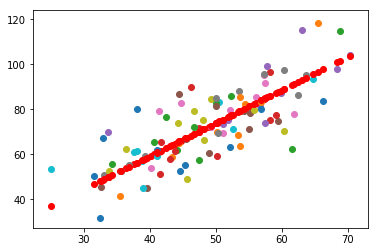

In [24]:
# Use this to visually discuss convergence rate based on learning rate

for num in range(0,10):
    run(num)
    plt.show()


## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

Starting gradient descent at b =  0 m =  0 error =  5565.10783448
Running...
After {0} iterations b =  0 m =  0  error =  5565.10783448


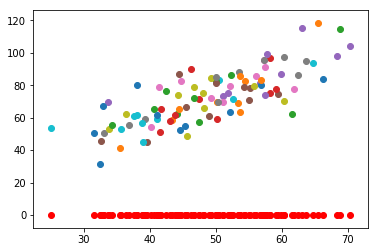

Starting gradient descent at b =  0 m =  0 error =  5565.10783448
Running...
After {0} iterations b =  1454.70101107 m =  73707.0297359  error =  1.35426676258e+13


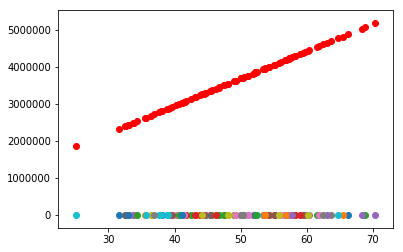

Starting gradient descent at b =  0 m =  0 error =  5565.10783448
Running...
After {0} iterations b =  -72197663.2168 m =  -3673303989.61  error =  3.36369164904e+22


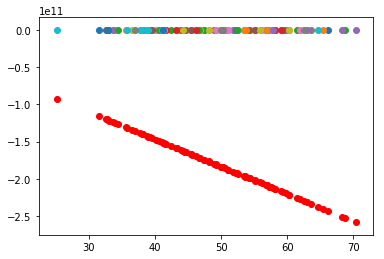

Starting gradient descent at b =  0 m =  0 error =  5565.10783448
Running...
After {0} iterations b =  3.59814917736e+12 m =  1.83068173803e+14  error =  8.35464756468e+31


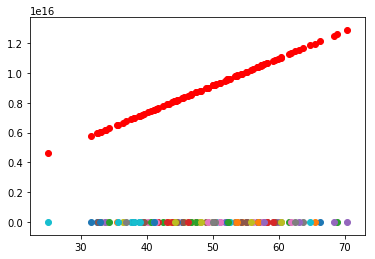

Starting gradient descent at b =  0 m =  0 error =  5565.10783448
Running...
After {0} iterations b =  -1.7932264811e+17 m =  -9.12365443812e+18  error =  2.07510506945e+41


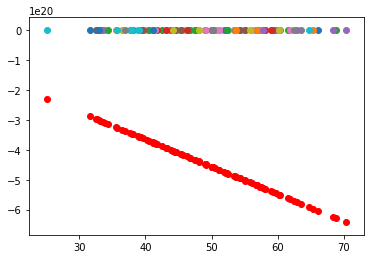

Starting gradient descent at b =  0 m =  0 error =  5565.10783448
Running...
After {0} iterations b =  8.93698691749e+21 m =  4.54699845293e+23  error =  5.15409060159e+50


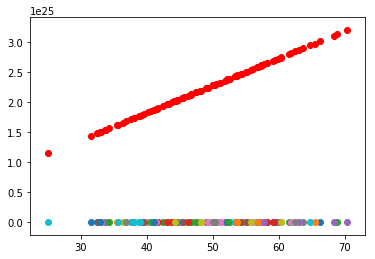

Starting gradient descent at b =  0 m =  0 error =  5565.10783448
Running...
After {0} iterations b =  -4.45396808519e+26 m =  -2.26610894474e+28  error =  1.28015927099e+60


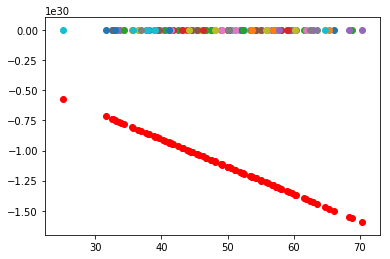

Starting gradient descent at b =  0 m =  0 error =  5565.10783448
Running...
After {0} iterations b =  2.21974496405e+31 m =  1.12937134301e+33  error =  3.17962543886e+69


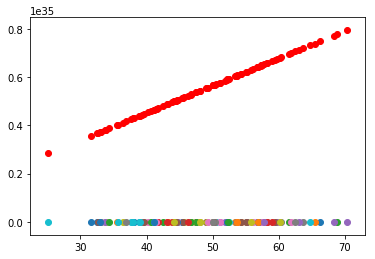

Starting gradient descent at b =  0 m =  0 error =  5565.10783448
Running...
After {0} iterations b =  -1.1062647085e+36 m =  -5.62850093048e+37  error =  7.89746882326e+78


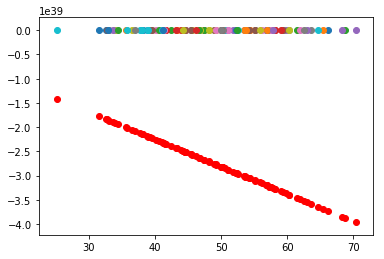

Starting gradient descent at b =  0 m =  0 error =  5565.10783448
Running...
After {0} iterations b =  5.51334331237e+40 m =  2.8051024068e+42  error =  1.96155223355e+88


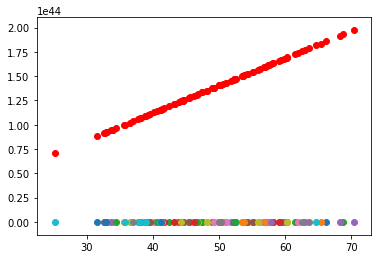

In [25]:
learning_rate = 10
for num in range(0,10):
    run(num,learning_rate)
    plt.show()